In [2]:
import quimb as qu
import quimb.tensor as qtn
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import itertools
# import dense_qubits as dq
# import exact_jwt
# import stabilizers as stab
import qubit_networks as beeky ###
from itertools import product
# import autoray
# import scipy.sparse as sparse
import functools
# import assorted_conts as ac
# from quimb.utils import pairwise

%matplotlib inline

*Lattice coordinate conventions*
 
So far, in `QubitEncodeNet`, `QubitEncodeVector`, etc, I used the convention that the origin $(0,0)$ is in the **upper left-hand** corner, and the row numbers count *downward*.

In [37]:
reload(beeky)
psi = beeky.QubitEncodeVector.rand(3,3)
psi_unflipped = psi.convert_to_tensor_network_2d(dummy_size=2, flip_x_direction=False)
psi_flipped = psi.convert_to_tensor_network_2d(dummy_size=2, flip_x_direction=True)

Chosen qubit coordinates:  [(0, 0), (2, 0), (4, 0)]


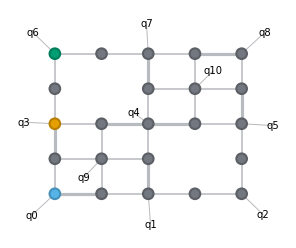

In [40]:
which_qs = (0, 3, 6)
coos = map(psi.qubit_to_coo_map, which_qs)
print("Chosen qubit coordinates: ", list(coos))

psi.setup_bmps_contraction().graph(color=['Q0','Q3', 'Q6'], figsize=(4,4), legend=False)

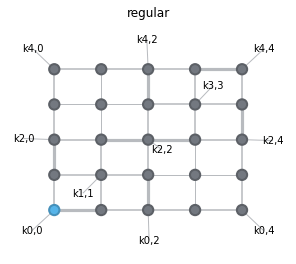

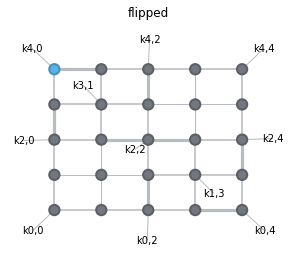

In [38]:
psi_unflipped.graph(color=['Q0'], figsize=(4,4), legend=False, title='regular')
psi_flipped.graph(color=['Q0'], figsize=(4,4), legend=False, title='flipped')

***
Specifying qubit numbers vs. qubit coordinates
***

`QEV.apply_gate` can take the `where` argument as lattice coordinates or qubit numbers.

In [23]:
psi = beeky.QubitEncodeVector.rand(3,3).setup_bmps_contraction_()

X = qu.pauli('X')
gate = X & X & X

target_qs = (3, 4, 9)
target_coos = tuple(map(psi.qubit_to_coo_map, target_qs))

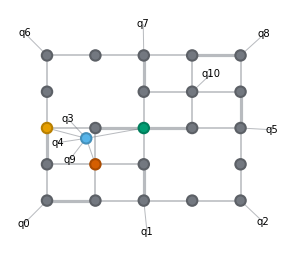

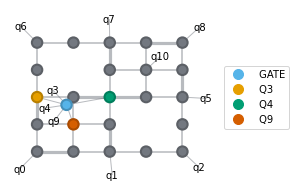

In [27]:
color=['GATE', 'Q3', 'Q4', 'Q9']
psi.apply_gate(G=gate, where=target_qs).draw(figsize=(4,4), color=color, legend=0)
psi.apply_gate(G=gate, where=target_coos, keys='coos').draw(figsize=(4,4), color=color)
